In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

2023-05-13 19:48:20.959788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 19:48:23.828299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# the data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
train_images.shape

(60000, 28, 28)

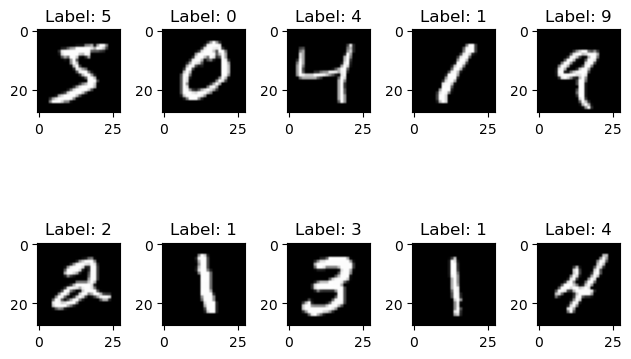

In [5]:
# plot the first 10 images in the dataset
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title("Label: %d" % train_labels[i])
plt.tight_layout()
plt.show()

In [11]:
#Preprocess the data

train_images_mod = train_images.reshape((60000,28*28)) #flatten the data from 2D to 1D
train_images_mod = train_images_mod.astype('float32')/255 #Normalize the value to 0 to 1

test_images_mod = test_images.reshape((10000,28*28)) #flatten the data from 2D to 1D
test_images_mod = test_images_mod.astype('float32')/255 #Normalize the value to 0 to 1

train_images_mod.shape

(60000, 784)

In [23]:
print(train_images_mod[10])


[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [7]:
from keras.utils import to_categorical

# Convert the labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [8]:
print(test_labels[10])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
from keras import models
from keras import layers

# Build the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

2023-05-13 19:48:53.911041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
# Train the model
model.fit(train_images_mod, train_labels, epochs=10, batch_size=128)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images_mod, test_labels)

Epoch 1/10


2023-05-13 19:50:45.153725: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 2ms/step - loss: 0.5144 - accuracy: 0.8600
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.9263
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2123 - accuracy: 0.9391
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1834 - accuracy: 0.9476
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9533
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1447 - accuracy: 0.9588
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9622
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1205 - accuracy: 0.9648
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9675
Epoch 10/10
  1/313 [..............................] - ETA: 49s - loss: 0.0930 - accuracy: 0.9688

2023-05-13 19:50:56.541855: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.1256 - accuracy: 0.9632


In [14]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9631999731063843


1/1 [==============================] - 0s 22ms/step


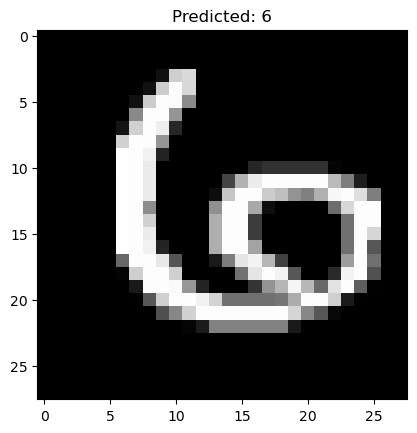

In [23]:
import numpy as np

def test_prediction(index = 0):
    test_image = test_images_mod[index]

    # Preprocess the image: add an extra dimension to represent the batch
    test_image = np.expand_dims(test_image, axis=0)
    
    # Use the model to predict the digit
    predicted_probabilities = model.predict(test_image)
    
    # Find the digit with the highest probability
    predicted_digit = np.argmax(predicted_probabilities)

    plt.title("Predicted: %d" % predicted_digit)
    plt.imshow(test_images[index], cmap='gray')


test_prediction(54)
plt.show()

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


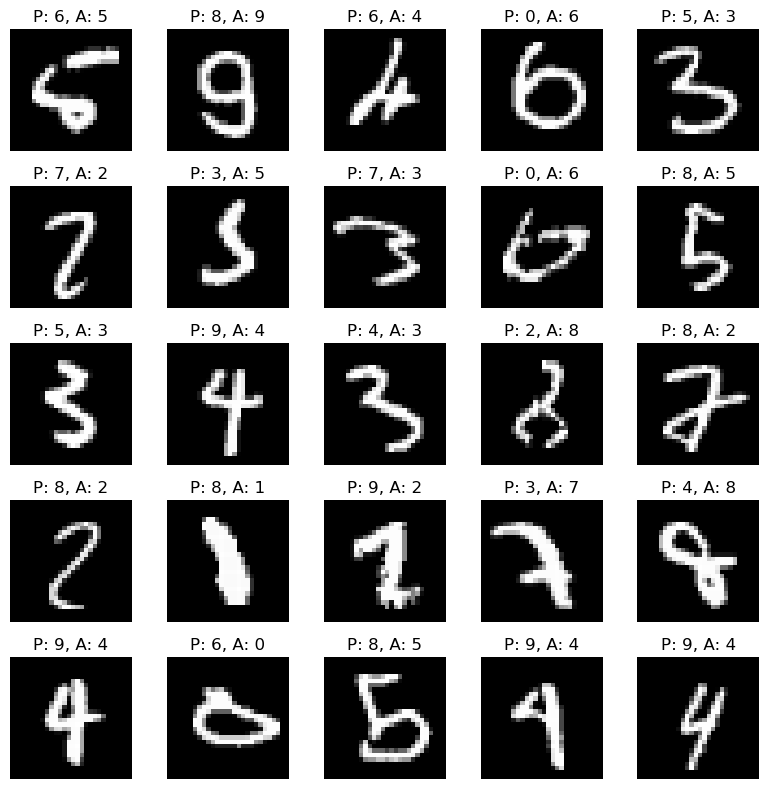

In [30]:
#Plot those that are misclassified
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
misclassified_images = []

for index in range(len(test_images)):
    if len(misclassified_images) == 25:  # Stop after finding 16 misclassified images
        break

    test_image = np.expand_dims(test_images_mod[index], axis=0)
    predicted_probabilities = model.predict(test_image)
    predicted_digit = np.argmax(predicted_probabilities)

    if(predicted_digit != np.argmax(test_labels[index])):
        misclassified_images.append((test_images[index], predicted_digit, np.argmax(test_labels[index])))

for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_images[i][0], cmap='gray')
    ax.set_title("P: %d, A: %d" % (misclassified_images[i][1], misclassified_images[i][2]))
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

In [28]:
len(misclassified_images)

16